In [42]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"my device is {device}")

my device is cuda


In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [6]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [7]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

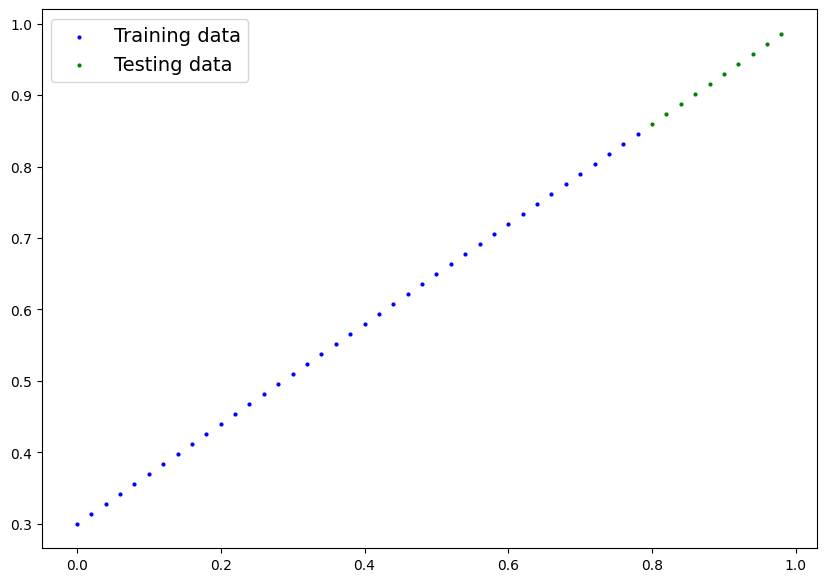

In [8]:
plot_predictions()


In [9]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)
    

torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
with torch.inference_mode():
    y_pred = model_0(X_test)

In [14]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")
print(y_test-y_pred)

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])
tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])


In [34]:

torch.manual_seed(42)
loss_l1 = nn.L1Loss()
model_0 = LinearRegressionModel()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 500
# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(0,epochs):


    model_0.train() # 1. 模型设置为训练模式，需要计算梯度
    y_preds = model_0(X_train) # forward 
    loss = loss_l1(y_preds,y_train)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        loss_test = loss_l1(test_pred, X_test)
        if epoch %20==0:
            epoch_count.append(epoch)
            test_loss_values.append(loss_test.detach().numpy())
            train_loss_values.append(loss.detach().numpy())
            print(f"epoch {epoch},loss_train:{loss},loss_test:{loss_test}")



epoch 0,loss_train:0.31288138031959534,loss_test:0.4480651915073395
epoch 20,loss_train:0.08908725529909134,loss_test:0.18429657816886902
epoch 40,loss_train:0.04543796554207802,loss_test:0.08060953766107559
epoch 60,loss_train:0.03818932920694351,loss_test:0.05586633086204529
epoch 80,loss_train:0.03132382780313492,loss_test:0.03963042423129082
epoch 100,loss_train:0.024458957836031914,loss_test:0.027516866102814674
epoch 120,loss_train:0.01758546568453312,loss_test:0.020042216405272484
epoch 140,loss_train:0.010716589167714119,loss_test:0.01866193488240242
epoch 160,loss_train:0.0038517764769494534,loss_test:0.02555248700082302
epoch 180,loss_train:0.008932482451200485,loss_test:0.027976905927062035
epoch 200,loss_train:0.008932482451200485,loss_test:0.027976905927062035
epoch 220,loss_train:0.008932482451200485,loss_test:0.027976905927062035
epoch 240,loss_train:0.008932482451200485,loss_test:0.027976905927062035
epoch 260,loss_train:0.008932482451200485,loss_test:0.0279769059270620

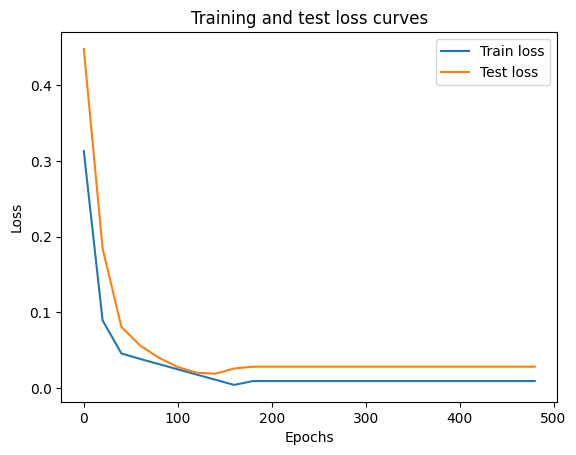

In [35]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [36]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [37]:
from pathlib import Path
Model_path = Path("Models")
Model_path.mkdir(parents=True,exist_ok=True)
model_name = "model_0.pth"
Model_save_path = Model_path/model_name
print(f"saving model to {Model_save_path}")
torch.save(model_0.state_dict(),Model_save_path)

saving model to Models\model_0.pth


In [41]:
model_loaded = LinearRegressionModel()
model_loaded.load_state_dict(torch.load("Models/model_0.pth"))
list(model_loaded.parameters())

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [51]:
w = 0.7
b = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step)
print(X.shape)
X = X.unsqueeze(dim=1)
print(X.shape)
Y = w*X + b


torch.Size([50])
torch.Size([50, 1])


In [52]:
print(len(X))

50


In [53]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [55]:
class LinearRegressionV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.Linear = nn.Linear(in_features=1,out_features=1)
    def forwar(self, x):
        return self.Linear(x)
    
torch.manual_seed(42)

model_1 = LinearRegressionV2()
model_1,model_1.state_dict()

(LinearRegressionV2(
   (Linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('Linear.weight', tensor([[0.7645]])),
              ('Linear.bias', tensor([0.8300]))]))

In [ ]:
model_1.to(device)

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [26]:
train_loss_values

[]

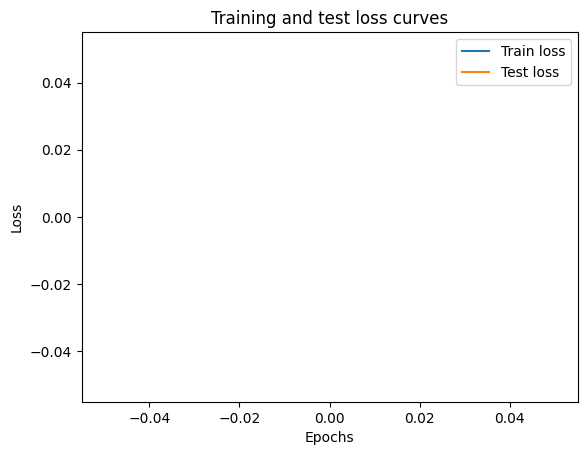